# Mia Tarantola - Unsupervised Learning

## Introduction

This is in an optional blog post that focuses on using linear algebra for unsupervised learning. I chose to focus on the first dection : Image compression with Singular value decomposition. 

SVD for a real matrix $A \in R^{mxn}$ is $$A = UDV^{T}$$ where $D \in R^{mxn}$ has non zero entries and where $U \in R^{mxm}$ and $V \in R^{nxn}$ are orthogonal matrices.

## Image Prep

In [115]:
from matplotlib import pyplot as plt
import numpy as np
import PIL
import urllib

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

Here we will read in our image, my dog :)

In [22]:
url = "https://i.imgur.com/b2Xy4Et.jpeg"
img = read_image(url)


Next, we will convert our RGB image into greyscale. Let's visualize this:

[Text(0.5, 1.0, 'greyscale')]

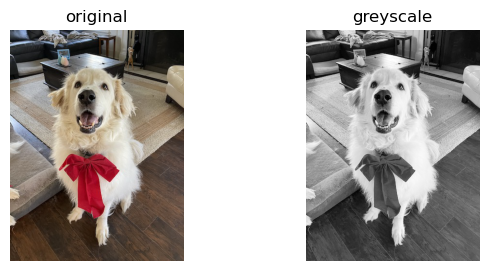

In [23]:
fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(img)

axarr[0].imshow(img)
axarr[0].axis("off")
axarr[0].set(title = "original")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "greyscale")

Let's create a svd construction function. We can call a built in numpy package on our image array. Sigma is a numpy array containing the singular values of our image. We can reconstruct our image from the equation in the introduction by constructing D, the diagonal matrix containg sigma values. Then, we can matrix multiply U,D, and V to reconstruct our image.

But, one of the many reasonse we like svd is that we can approximate by using a subset of each matrix. We only need the first k columns of U, the top k singular values in D and the first k rows of V. Assume k is smaller than m and n. Then we can matrix multiply the submatrices for our reconstruction.

In [95]:
def svd_reconstruct(img,k):
    U,sigma, V = np.linalg.svd(img)
    D = np.zeros_like(img,dtype=float)
    D[:min(img.shape),:min(img.shape)] = np.diag(sigma)    
    U_ = U[:,:k]
    D_ = D[:k,:k]
    V_=V[:k,:]
    A_ = U_ @ D_ @ V_
    return A_

In [25]:
grey_img.shape

(480, 360)

### Experiments

Now I will perform an experiment in which I reconstruct my image with different k values. I will increase k until I can no longer differentiate my original image from the reconstructed approximation. I will also determine the ammount of storage.

In [64]:
reconstructions = []

for i in range (1,7):
    reconstructions.append((svd_reconstruct(grey_img,12*i),12*i))

(0.0, 1.0, 0.0, 1.0)

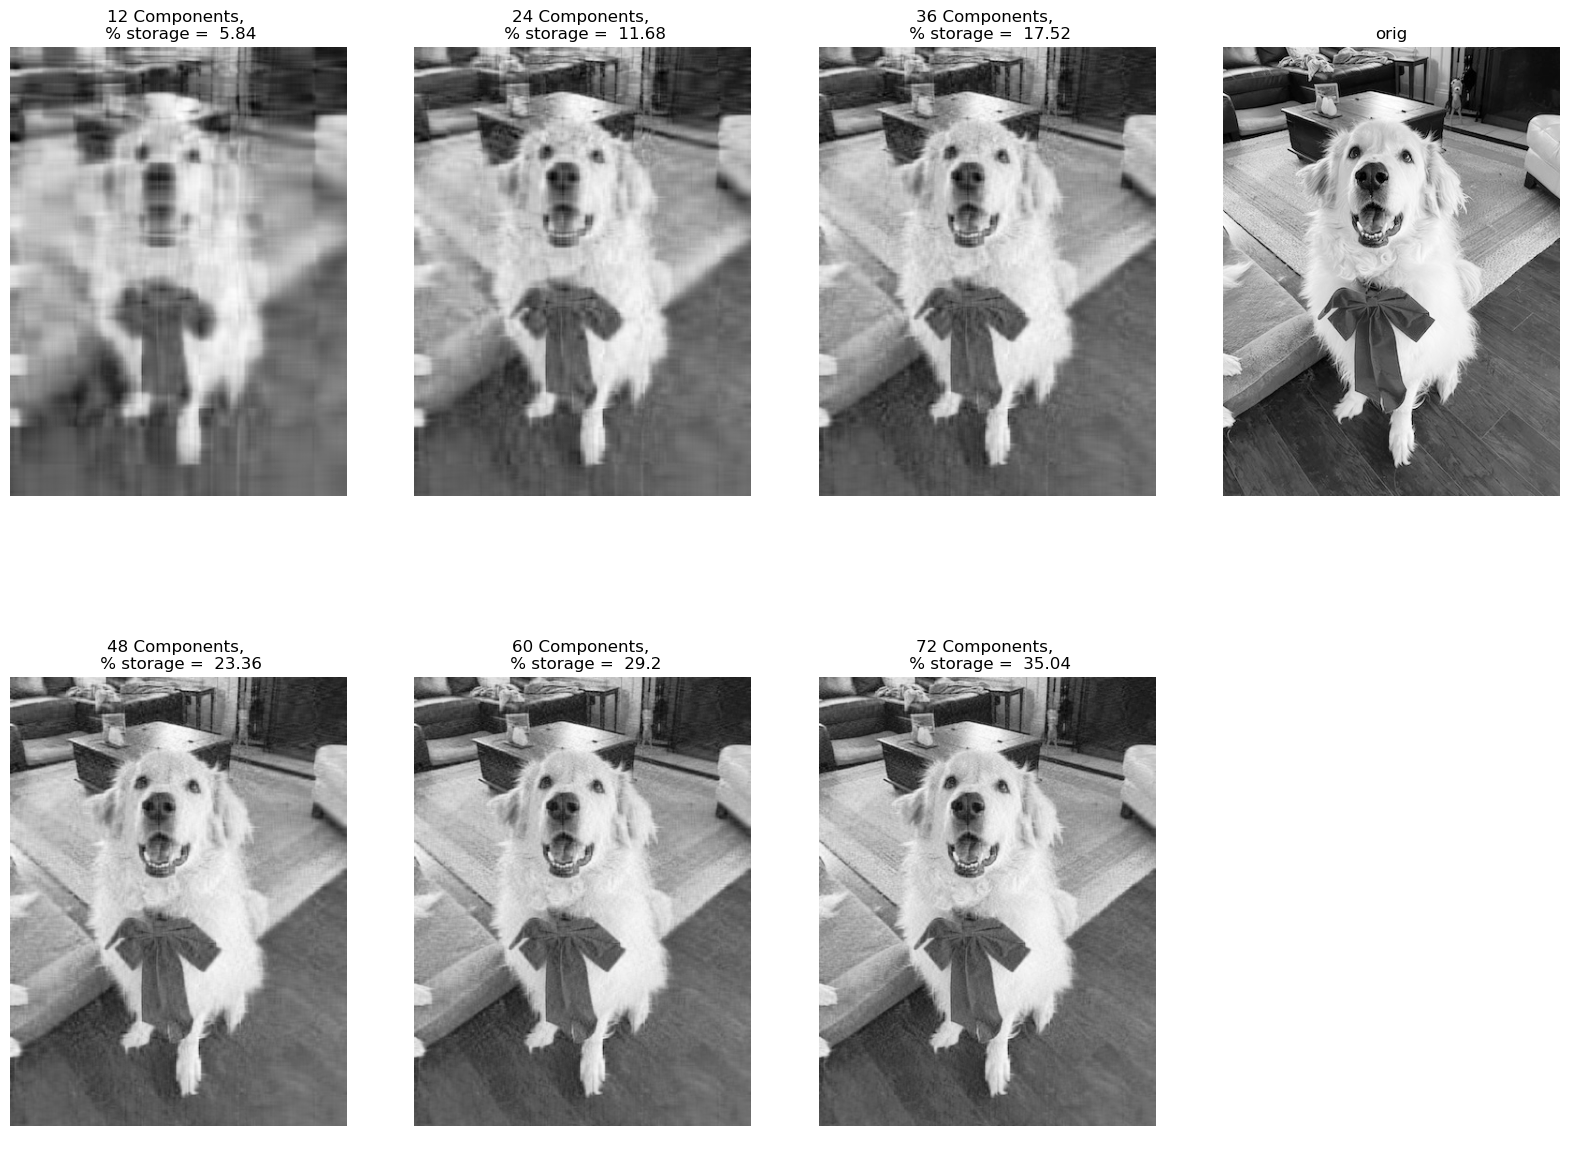

In [114]:
fig,axs = plt.subplots(2,4, figsize=(20,15))


count = 0
for i in range(2):
    for j in range(3):
        axs[i][j].imshow(reconstructions[count][0],cmap = "Greys")
        axs[i][j].set_title(str(reconstructions[count][1])+ " Components, \n % storage =  " + str(round(((grey_img.shape[0]+grey_img.shape[1]+1)*reconstructions[count][1])/(grey_img.shape[0]*grey_img.shape[1])*100,2))) 
        axs[i][j].axis("off")
        count+=1
axs[0][3].imshow(grey_img,cmap="Greys")
axs[0][3].axis("off")
axs[0][3].set_title("orig")

axs[1][3].axis("off")

### Calculating Storage

If an mxn image needs mn pixels(numbers) to represent it, than our original greyscale image needs $480 * 360 = 172,800$ numbers. Now we will consider our new images. We only need the first k columns of U, the top k singular values in D and the first k rows of V. If $\vec{u}$ is an $m x k$ vector and $\vec{v}$ is a $k x n$ vector, then the product is a $m x n$ maxtrix with $m*n$ items. However, these items can be stored by just storing $\vec{u_k}$ and $\vec{v_k}$. Storing the product $D_k \vec{u_k} \vec{v_k}$ can be stored with $m+n+k$ items because we just need to the items in D, k singular values. So, we simply get $(m+n+1)k$ items for a reconstructed approximation. And we can now calculate the storage needed for all of our images above.

### Conclusion

This blog post was pretty cool. I liked working with images and really visualizing the reconstructions in comparision to the original photo. It seems like there was not visible difference between our k = 72 image and our original. Storing this photo only takes 35% of the original storage space!